<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221119.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* Customer Analysis
* Iterators

In [1]:
import pandas as pd
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import re

from datetime import datetime, date, time, timezone, timedelta 

from functools import reduce
from collections import defaultdict

import prophet as pr

# Customer Analysis

In [2]:
os.listdir()

['.config',
 '1_orders_dataset.csv',
 'sales_vs_discount.csv',
 'online_retail.xlsx',
 'sales.csv',
 'ecommerce-data.csv',
 'groceries.csv',
 'online_retail_II.xlsx',
 'mock_sales_data.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'match_result_test.csv',
 '1_order_payments_dataset.csv',
 'mall_customers.csv',
 'test.csv',
 '1_customers_dataset.csv',
 'bz_data_analyis.csv',
 'scanner_data.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'sales_data_with_stores.csv',
 'sample-sales-data.csv',
 'sample_data']

In [4]:
df = pd.read_csv('sales_vs_discount.csv')
df['discount'] = df['discount'].astype(bool)
df.head()

,date,product,sales_amount,discount
0,2021-04-02,1014,261.241,False
1,2021-04-03,1014,271.223,False
2,2021-04-04,1014,227.140,False
3,2021-04-05,1014,203.027,False
4,2021-04-06,1014,242.594,False


In [6]:
cnt = df.groupby(['discount', 'product'])['sales_amount'].sum().reset_index()
cnt.head()

,discount,product,sales_amount
0,False,1014,21437.853018
1,True,1014,197550.449109


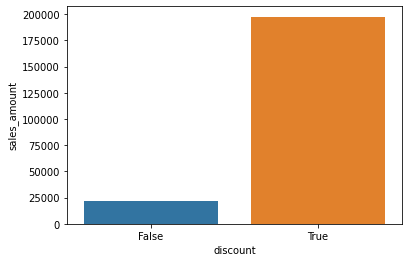

In [7]:
sns.barplot(data = cnt, x = 'discount', y = 'sales_amount')

In [9]:
df = pd.read_csv('sample-sales-data.csv')
df['ds'] = df.sales_date.to_numpy().astype('datetime64[D]')
df.head()

,store,product,sales_date,sales_qty,sales_rev,ds
0,1,29790057,2020-03-19,4,42.0,2020-03-19
1,2,29790057,2020-03-18,1,10.5,2020-03-18
2,3,29790057,2020-03-16,8,84.0,2020-03-16
3,4,29790057,2020-03-16,15,157.5,2020-03-16
4,5,29790057,2020-03-17,28,294.0,2020-03-17


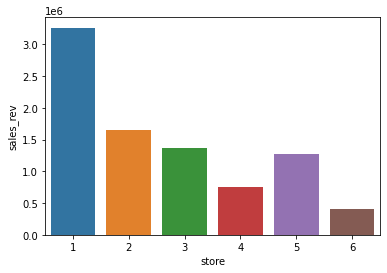

In [13]:
sns.barplot(data = df.groupby('store')['sales_rev'].sum().reset_index(), x = 'store', y = 'sales_rev')

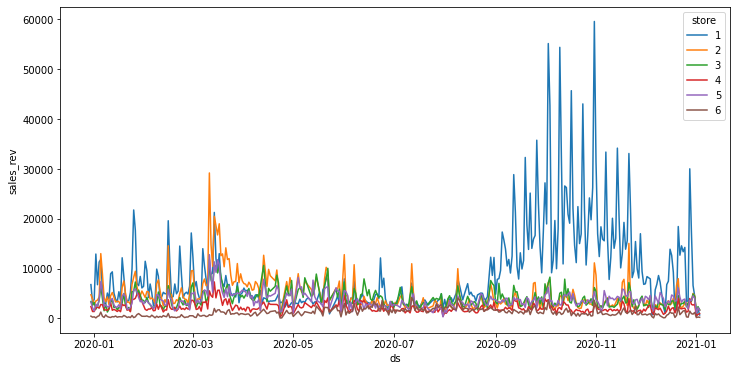

In [18]:
plt.figure(figsize = (12,6))
sns.lineplot(data = df.assign(store = df['store'].astype(str)).groupby(['ds','store'])['sales_rev'].sum().reset_index(), 
             x = 'ds', y = 'sales_rev', hue = 'store')

In [20]:
cnt = df.assign(store = df['store'].astype(str)).groupby(['ds','store'])['sales_rev'].sum().reset_index().rename(columns = {'sales_rev':'y'})
cnt.head()

,ds,store,y
0,2019-12-30,1,6794.49
1,2019-12-30,2,4756.33
2,2019-12-30,3,3401.77
3,2019-12-30,4,2388.21
4,2019-12-30,5,3293.48


In [33]:
def get_orcle(df) :
  list_work = df['store'].unique()
  res = list()

  for work in list_work : 
    
    temp = df[df['store'] == work].reindex(['ds','y'], axis = 1)

    m = pr.Prophet().fit(temp)
    future = m.make_future_dataframe(periods = 60)
    forecast = m.predict(future).reindex(['ds', 'yhat', 'trend'], axis = 1)
    temp = pd.merge(temp, forecast, 'left', 'ds')
    temp.insert(0, 'store', work)

    res.append(temp)
  
  res = pd.concat(res).reset_index().drop(['index'], axis = 1)

  return res

In [34]:
res = get_orcle(cnt)
res.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphh5smngo/yyhzz85d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphh5smngo/m7cv2ssu.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87296', 'data', 'file=/tmp/tmphh5smngo/yyhzz85d.json', 'init=/tmp/tmphh5smngo/m7cv2ssu.json', 'output', 'file=/tmp/tmphh5smngo/prophet_modelku63wurv/prophet_model-20221119000400.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:04:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:04:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality

,store,ds,y,yhat,trend
0,1,2019-12-30,6794.49,5916.007857,7701.986862
1,1,2019-12-31,3189.06,5817.310754,7679.634444
2,1,2020-01-01,3839.84,6871.202117,7657.282027
3,1,2020-01-02,12927.67,6153.107171,7634.929610
4,1,2020-01-03,6774.73,6485.604561,7612.577193


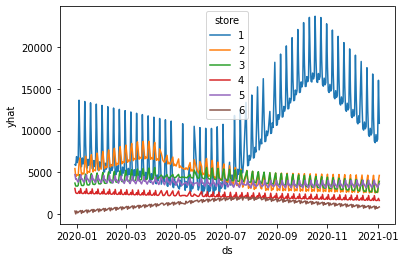

In [35]:
sns.lineplot(data = res.assign(store = res['store'].astype(str)), x = 'ds', y = 'yhat', hue = 'store' )

# Iterators

In [36]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [37]:
{k : eval(f'reduce(lambda acc, cur : acc + [cur["{k}"]], users, [])') for k in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [46]:
a = (a**a for a in range(100))
a

<generator object <genexpr> at 0x7fede2db70d0>

In [47]:
for _ in range(10) :
  print(next(a))

1
1
4
27
256
3125
46656
823543
16777216
387420489


In [48]:
for _ in range(10) :
  print(next(a))

10000000000
285311670611
8916100448256
302875106592253
11112006825558016
437893890380859375
18446744073709551616
827240261886336764177
39346408075296537575424
1978419655660313589123979
